In [3]:
import pickle

features_df = pickle.load(open('features_df_norm.pckl','rb'))

#features_df = features_df.set_index('id')
features_df.head()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,zcr_std,energy_std,energy_entropy_std,spectral_centroid_std,spectral_spread_std,spectral_entropy_std,spectral_flux_std,spectral_rolloff_std
id,,,,,,,,,,,,,,,,
--zKrCUdZ1U,0.60664,0.452165,0.951038,0.730981,0.806022,0.566484,0.405247,0.542598,0.0540405,0.0546794,0.146561,0.0490976,0.023701,0.479944,0.0142111,0.110918
-0BhYtZvea8,0.281272,0.203805,0.969532,0.47314,0.70603,0.196573,0.390028,0.224358,0.0261709,0.0454369,0.110257,0.0367215,0.0347843,0.24606,0.0113111,0.0484333
-0huGsj5LLs,0.20163,0.274486,0.938463,0.460175,0.732098,0.127708,0.413092,0.119396,0.0145525,0.0209702,0.121679,0.0314102,0.0333451,0.114478,0.00821743,0.0173077
-0oZNWif_jk,0.317682,0.634113,0.95837,0.552229,0.769222,0.22228,0.377771,0.202536,0.0248607,0.0973299,0.160945,0.0297144,0.0252656,0.224144,0.0108559,0.0426623
-1H6usve0nY,0.235866,0.203077,0.917693,0.431246,0.701946,0.191179,0.369329,0.195456,0.0268658,0.0325881,0.176405,0.0372308,0.0356617,0.26825,0.0102351,0.0536926


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
%matplotlib inline

In [7]:
mean_features = features_df.iloc[:,0:8]
mean_features.head()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean
id,,,,,,,,
--zKrCUdZ1U,0.60664,0.452165,0.951038,0.730981,0.806022,0.566484,0.405247,0.542598
-0BhYtZvea8,0.281272,0.203805,0.969532,0.47314,0.70603,0.196573,0.390028,0.224358
-0huGsj5LLs,0.20163,0.274486,0.938463,0.460175,0.732098,0.127708,0.413092,0.119396
-0oZNWif_jk,0.317682,0.634113,0.95837,0.552229,0.769222,0.22228,0.377771,0.202536
-1H6usve0nY,0.235866,0.203077,0.917693,0.431246,0.701946,0.191179,0.369329,0.195456


In [8]:
cluster_train, cluster_test = train_test_split(mean_features, test_size=.3)

In [9]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

In [10]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cluster_train)
    cluster_assign=model.predict(cluster_train)
    meandist.append(sum(np.min(cdist(cluster_train, model.cluster_centers_, 'euclidean'), axis=1)) 
/ cluster_train.shape[0])

Text(0.5, 1.0, 'Selecting k clusters via the Elbow Method')

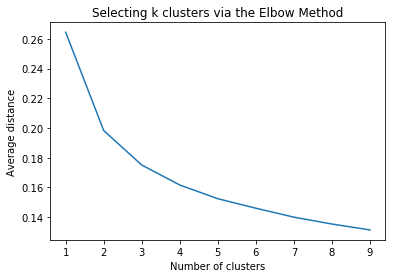

In [11]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k clusters via the Elbow Method')

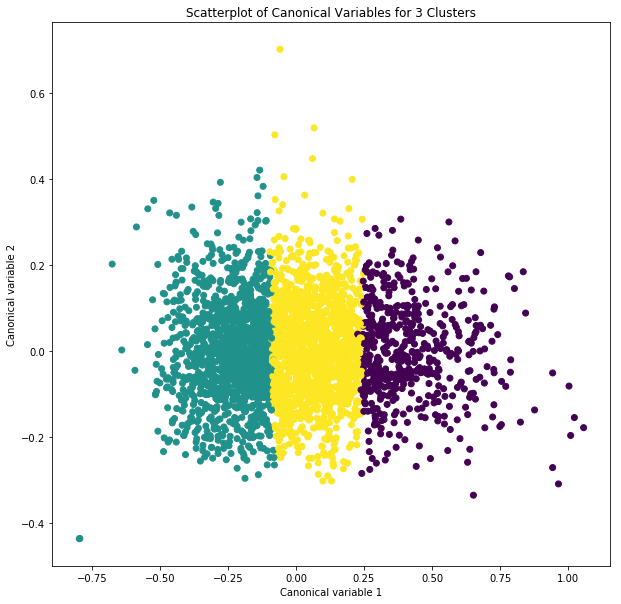

In [18]:
# Interpret 3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(cluster_train)
test_assign=model3.predict(cluster_test)

# plot clusters

from sklearn.decomposition import PCA

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(cluster_train)
plt.figure(figsize = (10,10))
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

In [190]:
from sklearn.metrics import pairwise_distances
#  from sklearn.metrics import pairwise-distances_argmin_min is also available but the actual distance is not important

min_dists = pairwise_distances(mean_features.iloc[0,:].values.reshape(1,-1), mean_features.iloc[1:,:].values)


In [197]:
min_dists[0]

array([0.69477493, 0.80389549, 0.62035133, ..., 0.3205154 , 0.51560204,
       0.37042501])

In [198]:
print(min_dists.argsort()[:20])

[[2376  227  163 ... 1963 3316 1986]]


In [200]:
mean_features.iloc[0,:]

zcr_mean                   0.60664
energy_mean               0.452165
energy_entropy_mean       0.951038
spectral_centroid_mean    0.730981
spectral_spread_mean      0.806022
spectral_entropy_mean     0.566484
spectral_flux_mean        0.405247
spectral_rolloff_mean     0.542598
Name: --zKrCUdZ1U, dtype: object

Somewhat expectedly, in such a large data set, the lines drawn between different clusters (genres, if you will) are not well-defined. That is, one small change in a parameter- whatever parameter it may be- may not necessarily change a song significantly enough to alter its classification from one genre to another, as these genre classifications are more of a continuum than a binary manifold. So, while

In summary, classififying songs

In [150]:
features_list = list(mean_features.columns)

train_df = cluster_train.loc[:,features_list]
train_df['label'] = model7.labels_

test_df = cluster_test.loc[:,features_list]
test_df['label'] = test_assign

In [152]:
test_df.head()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,label
id,,,,,,,,,
--zKrCUdZ1U,0.60664,0.452165,0.951038,0.730981,0.806022,0.566484,0.405247,0.542598,4
BPgEgaPk62M,0.36856,0.357193,0.949418,0.556199,0.76218,0.284299,0.414354,0.265166,1
lzCJNB5dGW8,0.192395,0.142551,0.909577,0.441842,0.753254,0.12489,0.488789,0.126915,6
xoMQm2kObrw,0.402822,0.309997,0.955373,0.59559,0.766341,0.386489,0.258592,0.323066,0
r951RBM0hAM,0.413981,0.379288,0.947049,0.653798,0.844472,0.316669,0.354533,0.297733,1


number of estimated clusters : 3


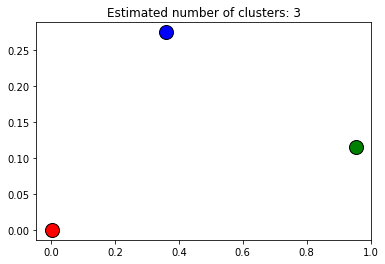

In [167]:
# Interpret 7 cluster solution
model7=KMeans(n_clusters=7)
model7.fit(cluster_train)
test_assign=model7.predict(cluster_test)

# plot clusters

from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(mean_features, quantile = 0.2, n_samples = len(mean_features.zcr_mean))

ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
ms.fit(mean_features)
ms_labels = ms.labels_
cluster_centers = ms.cluster_centers_


labels_unique = np.unique(ms_labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = ms_labels == k
    cluster_center = cluster_centers[k]
    #plt.plot(mean_features[my_members, 0], mean_features[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# plot_columns = pca_2.fit_transform(cluster_train)
# plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model7.labels_,)
# plt.xlabel('Canonical variable 1')
# plt.ylabel('Canonical variable 2')
# plt.title('Scatterplot of Canonical Variables for 7 Clusters')
# plt.show()

In [33]:
# https://gist.github.com/benadaba/0f4274b82b4f2fa2bf35

"""
BEGIN multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""
# create a unique identifier variable from the index for the 
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslist=list(clus_train['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist
# convert newlist dictionary to a dataframe
newclus=DataFrame.from_dict(newlist, orient='index')
newclus
# rename the cluster assignment column
newclus.columns = ['cluster']

# now do the same for the cluster assignment variable
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

"""
END multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""

# FINALLY calculate clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)


# validate clusters in training data by examining cluster differences in lifeexpectancy using ANOVA
# first have to merge lifeexpectancy with clustering variables and cluster assignment data 
gpa_data=data_clean['lifeexpectancy']
# split lifeexpectancy data into train and test sets
gpa_train, gpa_test = train_test_split(gpa_data, test_size=.3, random_state=123)
gpa_train1=pd.DataFrame(gpa_train)
gpa_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(gpa_train1, merged_train, on='index')
sub1 = merged_train_all[['lifeexpectancy', 'cluster']].dropna()

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

lfemod = smf.ols(formula='lifeexpectancy ~ C(cluster)', data=sub1).fit()
print (lfemod.summary())

print ('means for lifeexpectancy by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

print ('standard deviations for lifeexpectancy by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

mc1 = multi.MultiComparison(sub1['lifeexpectancy'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())









"""
VALIDATION
BEGIN multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster in test data set
"""
# create a variable out of the index for the cluster training dataframe to merge on
clus_test.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslistval=list(clus_test['index'])
# create a list of cluster assignments
#labelsval=list(clusassignval)
labelsval=list(cluslistval)
# combine index variable list with labels list into a dictionary
#newlistval=dict(zip(cluslistval, clusassignval))
newlistval=dict(zip(cluslistval, labelsval))
newlistval
# convert newlist dictionary to a dataframe
newclusval=DataFrame.from_dict(newlistval, orient='index')
newclusval
# rename the cluster assignment column
newclusval.columns = ['cluster']
# create a variable out of the index for the cluster assignment dataframe to merge on
newclusval.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_test=pd.merge(clus_test, newclusval, on='index')
# cluster frequencies
merged_test.cluster.value_counts()
"""
END multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""

# calculate test data clustering variable means by cluster
clustergrpval = merged_test.groupby('cluster').mean()
print ("Test data clustering variable means by cluster")
print(clustergrpval)

KeyError: 'index'